## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=10,activation='softmax',name='output')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

momentum=[0,0.1,0.5,0.9]
nesterov= True

results = {}

In [16]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for mom in momentum:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {mom}")
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"exp-mom-{mom}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==================

50000/50000 [==============================] - 3s 58us/step - loss: 1.6735 - accuracy: 0.4161 - val_loss: 1.6797 - val_accuracy: 0.4185
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6699 - accuracy: 0.4180 - val_loss: 1.6764 - val_accuracy: 0.4177
Experiment with LR = 0.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)

50000/50000 [==============================] - 3s 59us/step - loss: 1.6836 - accuracy: 0.4149 - val_loss: 1.6875 - val_accuracy: 0.4126
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6800 - accuracy: 0.4156 - val_loss: 1.6826 - val_accuracy: 0.4131
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6762 - accuracy: 0.4172 - val_loss: 1.6801 - val_accuracy: 0.4135
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6724 - accuracy: 0.4189 - val_loss: 1.6768 - val_accuracy: 0.4144
Experiment with LR = 0.5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________________

50000/50000 [==============================] - 3s 59us/step - loss: 1.5594 - accuracy: 0.4555 - val_loss: 1.5754 - val_accuracy: 0.4479
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5546 - accuracy: 0.4581 - val_loss: 1.5713 - val_accuracy: 0.4469
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5503 - accuracy: 0.4570 - val_loss: 1.5689 - val_accuracy: 0.4477
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5464 - accuracy: 0.4606 - val_loss: 1.5632 - val_accuracy: 0.4504
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5425 - accuracy: 0.4605 - val_loss: 1.5680 - val_accuracy: 0.4433
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5380 - accuracy: 0.4623 - val_loss: 1.5605 - val_accuracy: 0.4478
Experiment with LR = 0.9
Model: "model_1"
_________________________________________________________________
Layer (type)    

50000/50000 [==============================] - 3s 59us/step - loss: 1.1833 - accuracy: 0.5855 - val_loss: 1.3637 - val_accuracy: 0.5250
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1736 - accuracy: 0.5877 - val_loss: 1.3588 - val_accuracy: 0.5220
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1650 - accuracy: 0.5908 - val_loss: 1.3616 - val_accuracy: 0.5224
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1577 - accuracy: 0.5947 - val_loss: 1.3354 - val_accuracy: 0.5338
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1473 - accuracy: 0.5986 - val_loss: 1.3698 - val_accuracy: 0.5195
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1401 - accuracy: 0.6023 - val_loss: 1.3571 - val_accuracy: 0.5212
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1307 - accuracy: 0.6053 - val_loss: 1.3523

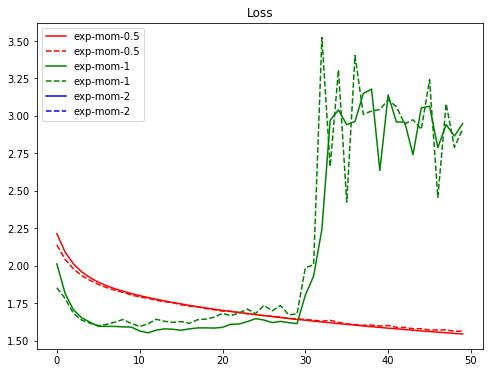

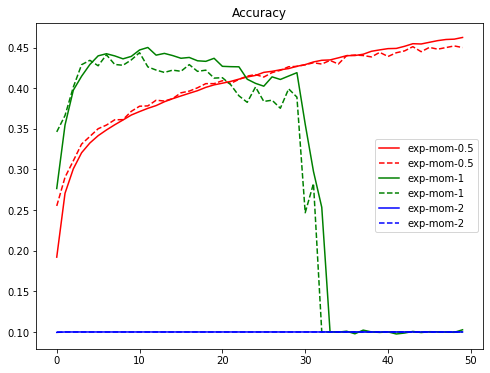

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

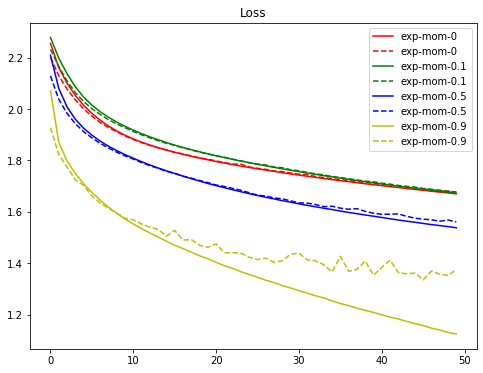

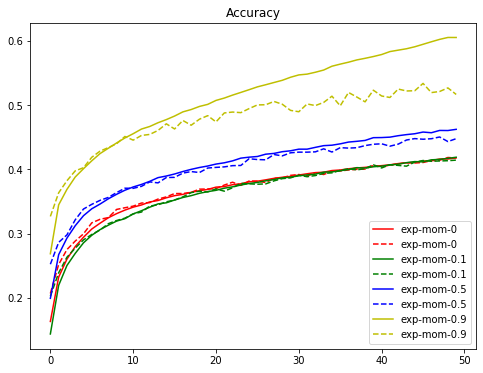

In [18]:
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()